# <u>PRACTICAL - 4</u>

## <u>QUESTION</u> -

### Download a dataset and check whether outliers are present in the dataset. Use different methods of outlier detection and compare their performance. 

### <u>DATASET</u>  -> Wine Quality (https://archive.ics.uci.edu/dataset/186/wine+quality)

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
from scipy.stats import chi2
from matplotlib import patches
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
# Import Dataset

wine_quality = fetch_ucirepo(id=186) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
frames = [X,y]
df=pd.concat(frames, axis=1)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.shape

(6497, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
d = []
u = []
t = []
for col in df:
    d.append(col)
    u.append(df[col].nunique())
    t.append(df[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,fixed_acidity,float64,106
1,volatile_acidity,float64,187
2,citric_acid,float64,89
3,residual_sugar,float64,316
4,chlorides,float64,214
5,free_sulfur_dioxide,float64,135
6,total_sulfur_dioxide,float64,276
7,density,float64,998
8,pH,float64,108
9,sulphates,float64,111


In [6]:
# Checking Null Values

df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Checking Duplicate values

df.duplicated().sum()

1179

In [8]:
# Dropping Duplicate Values

df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5318 non-null   float64
 1   volatile_acidity      5318 non-null   float64
 2   citric_acid           5318 non-null   float64
 3   residual_sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free_sulfur_dioxide   5318 non-null   float64
 6   total_sulfur_dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 498.7 KB


In [11]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
# Detecting Outliers 

def boxplots(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n = 3  
    m = 4  
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(20, 15))

    for idx, col in enumerate(num_cols):
        i = idx // m
        j = idx % m
        sns.boxplot(data=df, x=col, ax=axes[i][j])
        axes[i][j].set_title(f'Box Plot: {col}', fontsize=14)
    plt.tight_layout()
    plt.show()

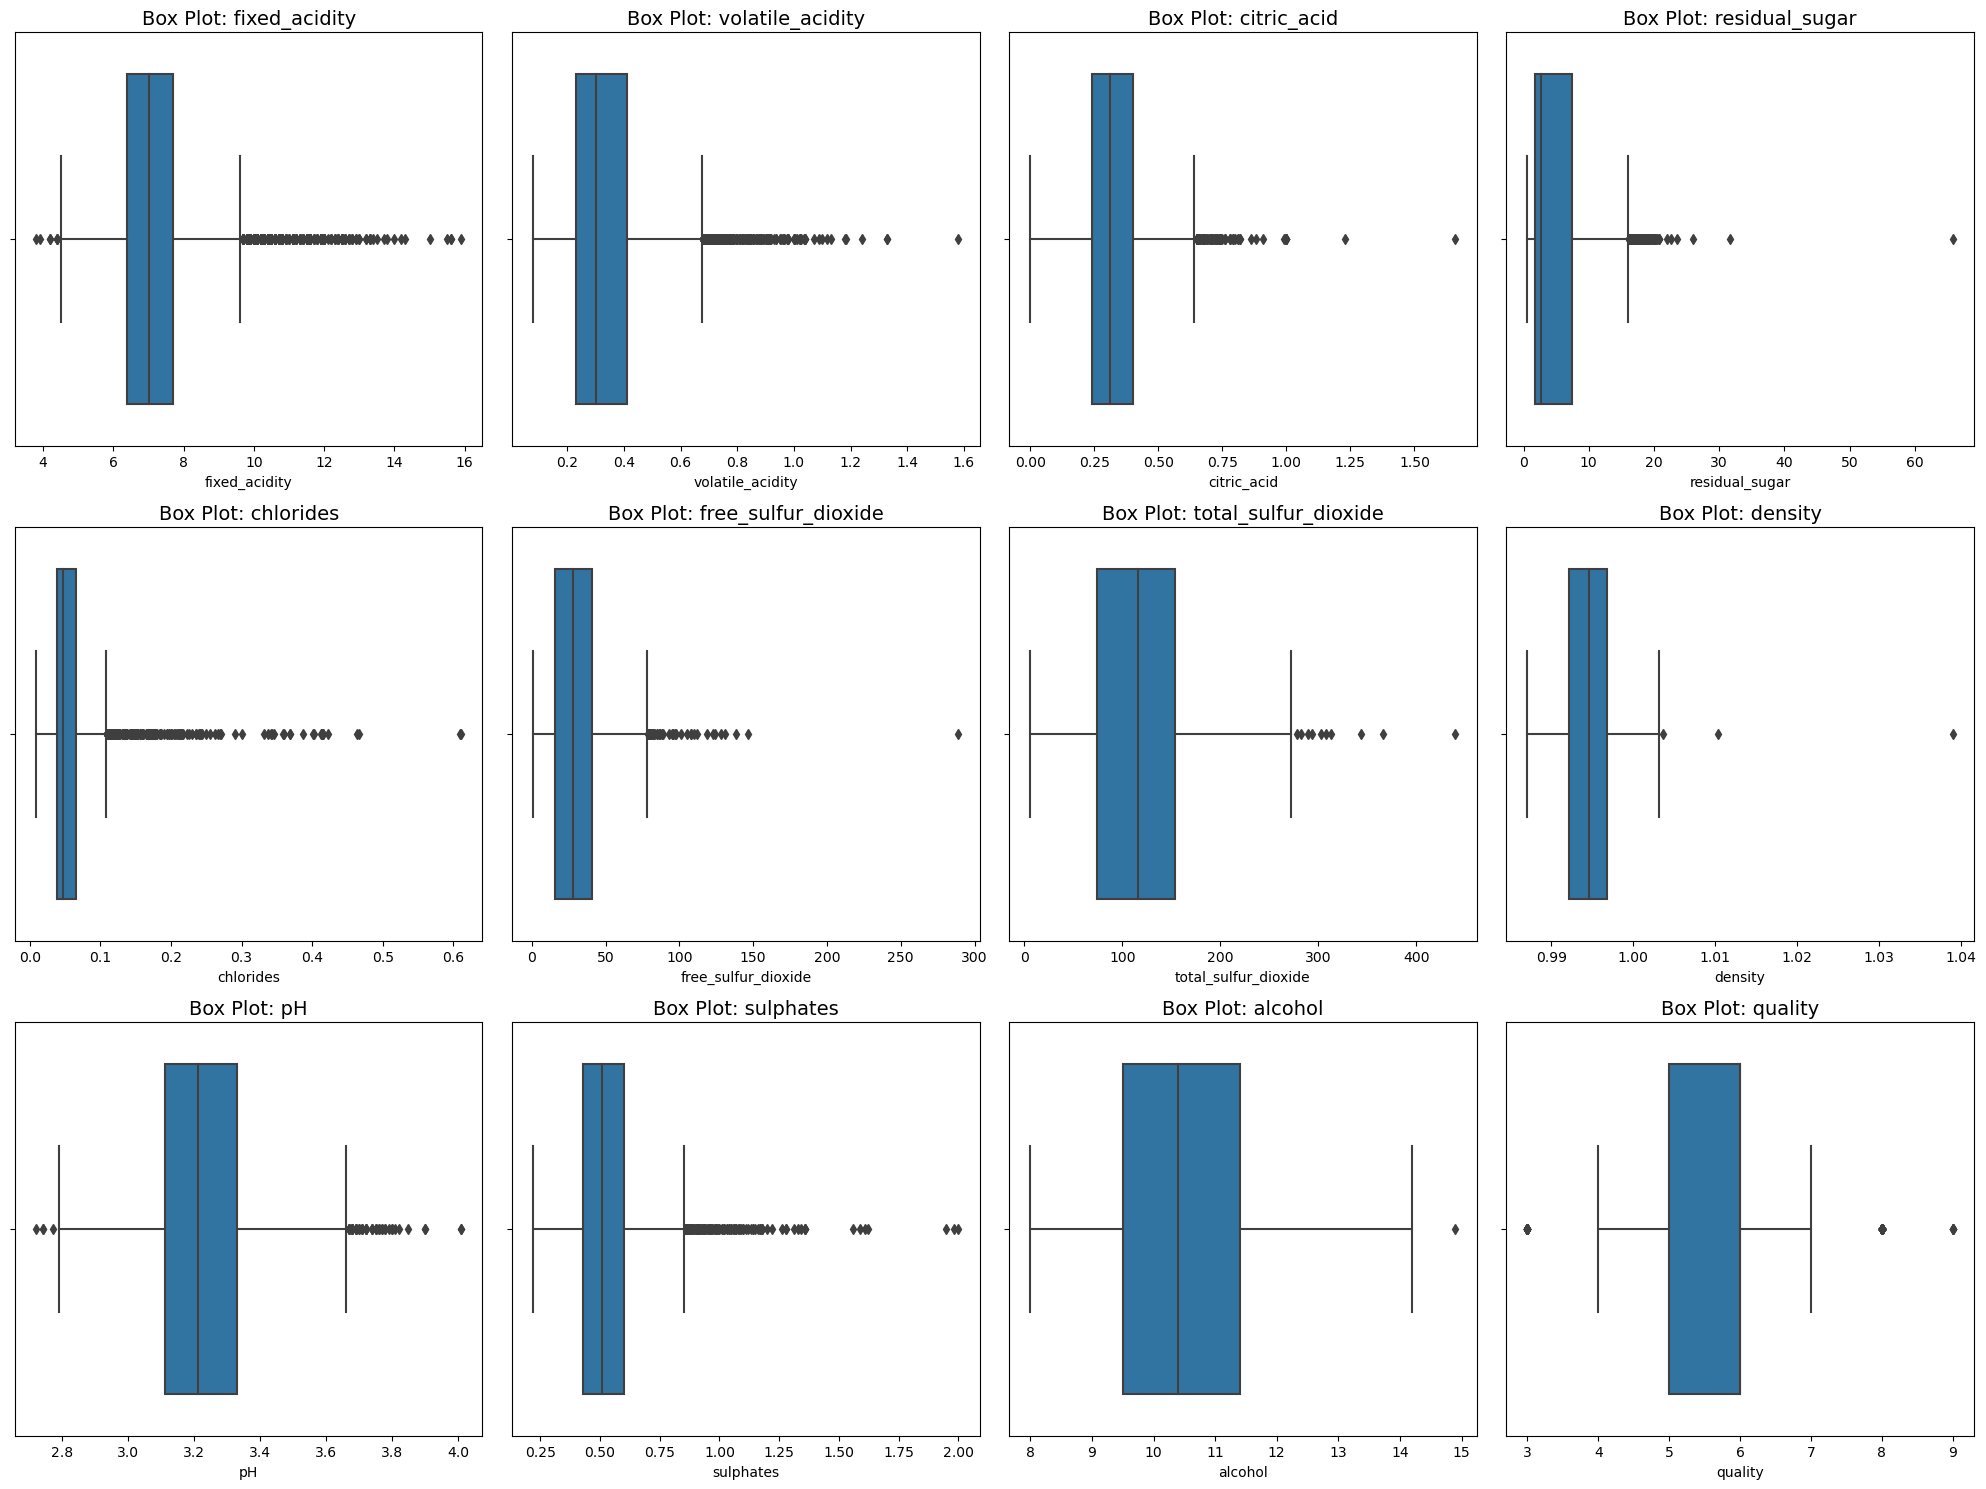

In [14]:
boxplots(df)

#### STATISTICAL APPROACH (PARAMETRIC)

#### Z-SCORE METHOD

In [15]:
def Zscore_outlier(df):
    total_outliers_count_1 = 0 
    feature_outliers = {} 

    for col in df.columns:
        m = np.mean(df[col])  
        sd = np.std(df[col])  
        outliers = []  
        for i in df[col]:
            z = (i - m) / sd  
            if np.abs(z) > 3:  
                outliers.append(i)

        feature_outliers[col] = len(outliers)
        total_outliers_count_1 += len(outliers) 
    
    print("Outliers per feature:", feature_outliers)
    print("Total number of outliers:", total_outliers_count_1)
    return total_outliers_count_1

total_outliers_1=Zscore_outlier(df)

Outliers per feature: {'fixed_acidity': 108, 'volatile_acidity': 77, 'citric_acid': 23, 'residual_sugar': 42, 'chlorides': 94, 'free_sulfur_dioxide': 27, 'total_sulfur_dioxide': 8, 'density': 3, 'pH': 32, 'sulphates': 63, 'alcohol': 2, 'quality': 35}
Total number of outliers: 514


#### MAHALANOBIS DISTANCE METHOD

In [16]:
df1 = df.to_numpy()
covariance = np.cov(df1, rowvar=False)
covariance_pm1 = np.linalg.inv(covariance)
centerpoint = np.mean(df1, axis=0)

distances = []
for i, val in enumerate(df1):
    p1 = val
    p2 = centerpoint
    distance = (p1 - p2).T.dot(covariance_pm1).dot(p1 - p2)
    distances.append(distance)
distances = np.array(distances)

cutoff = chi2.ppf(0.95, df.shape[1])
outlierIndexes = np.where(distances > cutoff)[0]

total_outliers_2 = len(outlierIndexes)
print(f'Total number of outliers: {total_outliers_2}')

Total number of outliers: 429


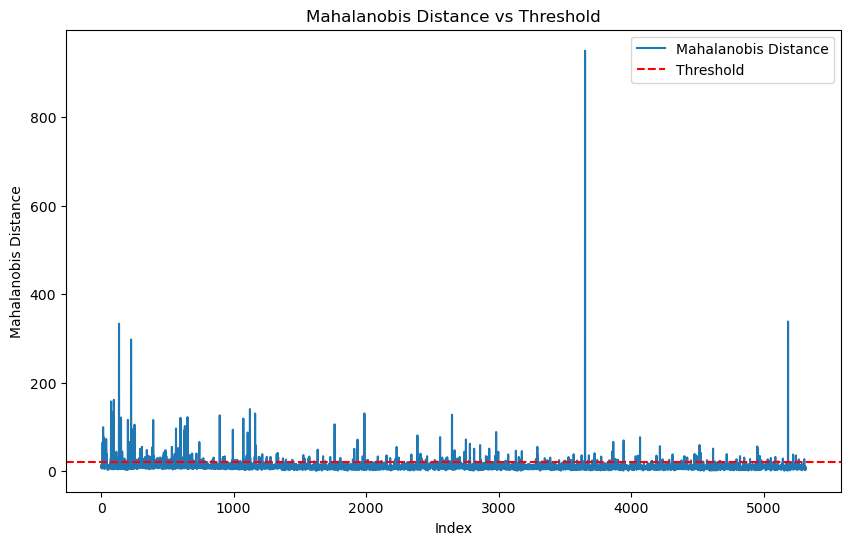

In [17]:
plt.figure(figsize=(10, 6))

# Plotting the Mahalanobis distances for each data point

plt.plot(distances, label='Mahalanobis Distance')

# Drawing a horizontal line to represent the threshold (cutoff value)

plt.axhline(y=cutoff, color='r', linestyle='--', label='Threshold')
plt.xlabel('Index')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance vs Threshold')
plt.legend()
plt.show()

#### STATISTICAL APPROACH (NON-PARAMETRIC)

#### IQR (INTER QUARTILE RANGE) METHOD

In [18]:
def iqr_outliers(df):
    total_outliers_count_3 = 0  
    feature_outliers = {}  

    for col in df.columns:
        q1 = df[col].quantile(0.25)  
        q3 = df[col].quantile(0.75)  
        iqr = q3 - q1 
        lower_tail = q1 - 1.5 * iqr
        upper_tail = q3 + 1.5 * iqr

        outliers = df[(df[col] < lower_tail) | (df[col] > upper_tail)]
        
        feature_outliers[col] = len(outliers)
        total_outliers_count_3 += len(outliers)  

    print("Outliers per feature:", feature_outliers)
    print("Total number of outliers:", total_outliers_count_3)
    return total_outliers_count_3

total_outliers_3=iqr_outliers(df)

Outliers per feature: {'fixed_acidity': 304, 'volatile_acidity': 279, 'citric_acid': 143, 'residual_sugar': 141, 'chlorides': 237, 'free_sulfur_dioxide': 44, 'total_sulfur_dioxide': 10, 'density': 3, 'pH': 49, 'sulphates': 163, 'alcohol': 1, 'quality': 183}
Total number of outliers: 1557


#### PROXIMITY BASED APPROACH

#### LOCAL OUTLIER FACTOR(LOF)

Number of outliers detected: 122


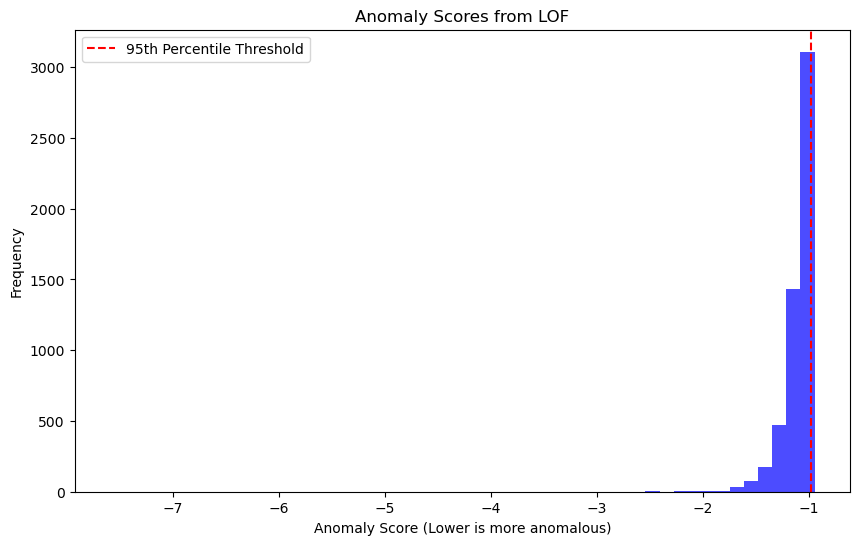

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,LOF_Label,Anomaly_Score
0,0.139792,2.114903,-2.164421,-0.699878,0.523572,-1.068966,-1.410881,1.100664,1.779190,0.177632,-0.969111,-0.904469,1,-0.979367
1,0.442902,3.184749,-2.164421,-0.544330,1.120403,-0.282568,-0.829676,0.763426,-0.153621,0.979028,-0.631801,-0.904469,1,-1.166856
2,0.442902,2.471518,-1.892613,-0.610993,0.957631,-0.844280,-1.058636,0.830873,0.220472,0.778679,-0.631801,-0.904469,1,-1.033582
3,3.019338,-0.381405,1.640891,-0.699878,0.496443,-0.731938,-0.952962,1.168111,-0.403016,0.311198,-0.631801,0.232370,1,-0.990531
4,0.139792,1.877159,-2.164421,-0.722099,0.496443,-0.956623,-1.305208,1.100664,1.779190,0.177632,-0.969111,-0.904469,1,-0.983049


In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto') 
outlier_labels = lof.fit_predict(data_scaled)

anomaly_scores = lof.negative_outlier_factor_  
outliers = np.where(outlier_labels == -1)[0]

total_outliers_4 = len(outliers)

print(f"Number of outliers detected: {total_outliers_4}")

data_with_lof = pd.DataFrame(data_scaled, columns=df.columns) 
data_with_lof['LOF_Label'] = outlier_labels
data_with_lof['Anomaly_Score'] = anomaly_scores 

plt.figure(figsize=(10, 6))

# Plotting a histogram to visualize the distribution of anomaly scores

plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.7)

# Adding a vertical dashed red line at the 95th percentile value of the anomaly scores
# This threshold is typically used to identify anomalies

plt.axvline(x=np.percentile(anomaly_scores, 95), color='red', linestyle='--', label='95th Percentile Threshold')
plt.title('Anomaly Scores from LOF')
plt.xlabel('Anomaly Score (Lower is more anomalous)')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

data_with_lof.head()

#### k-NEAREST NEIGHBORS

Number of outliers detected: 266


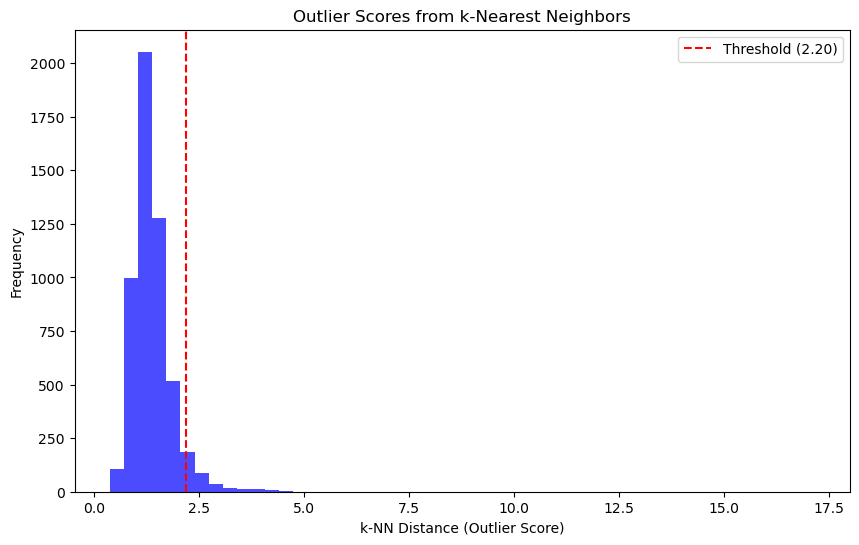

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Outlier_Score,Is_Outlier
0,0.139792,2.114903,-2.164421,-0.699878,0.523572,-1.068966,-1.410881,1.100664,1.779190,0.177632,-0.969111,-0.904469,0.695343,0
1,0.442902,3.184749,-2.164421,-0.544330,1.120403,-0.282568,-0.829676,0.763426,-0.153621,0.979028,-0.631801,-0.904469,1.665176,0
2,0.442902,2.471518,-1.892613,-0.610993,0.957631,-0.844280,-1.058636,0.830873,0.220472,0.778679,-0.631801,-0.904469,1.192381,0
3,3.019338,-0.381405,1.640891,-0.699878,0.496443,-0.731938,-0.952962,1.168111,-0.403016,0.311198,-0.631801,0.232370,1.519624,0
4,0.139792,1.877159,-2.164421,-0.722099,0.496443,-0.956623,-1.305208,1.100664,1.779190,0.177632,-0.969111,-0.904469,0.689268,0


In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
n_neighbors = 5  
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(data_scaled)

distances, indices = knn.kneighbors(data_scaled)
outlier_scores = distances[:, n_neighbors - 1]

threshold = np.percentile(outlier_scores, 95)  
outliers = np.where(outlier_scores > threshold)[0]  
total_outliers_5=len(outliers)
print(f"Number of outliers detected: {total_outliers_5}")

data_with_scores = pd.DataFrame(data_scaled, columns=df.columns) 
data_with_scores['Outlier_Score'] = outlier_scores
data_with_scores['Is_Outlier'] = 0
data_with_scores.loc[outliers, 'Is_Outlier'] = 1

plt.figure(figsize=(10, 6))

# Plotting a histogram to visualize the distribution of outlier scores

plt.hist(outlier_scores, bins=50, color='blue', alpha=0.7)

# Adding a vertical dashed red line to represent the outlier detection threshold
# 'x=threshold' specifies the x-coordinate of the threshold line
# 'label=f'Threshold ({threshold:.2f})'' dynamically adds the threshold value in the legend

plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.title('Outlier Scores from k-Nearest Neighbors')
plt.xlabel('k-NN Distance (Outlier Score)')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

data_with_scores.head()

#### CLUSTERING BASED APPROACH

#### DBSCAN

Number of outliers detected: 226


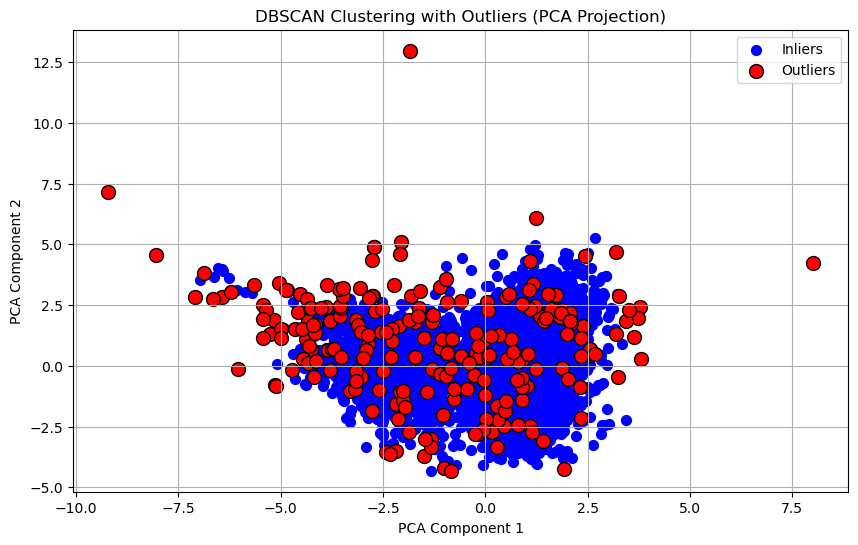

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster_Label
0,0.139792,2.114903,-2.164421,-0.699878,0.523572,-1.068966,-1.410881,1.100664,1.779190,0.177632,-0.969111,-0.904469,0
1,0.442902,3.184749,-2.164421,-0.544330,1.120403,-0.282568,-0.829676,0.763426,-0.153621,0.979028,-0.631801,-0.904469,0
2,0.442902,2.471518,-1.892613,-0.610993,0.957631,-0.844280,-1.058636,0.830873,0.220472,0.778679,-0.631801,-0.904469,0
3,3.019338,-0.381405,1.640891,-0.699878,0.496443,-0.731938,-0.952962,1.168111,-0.403016,0.311198,-0.631801,0.232370,0
4,0.139792,1.877159,-2.164421,-0.722099,0.496443,-0.956623,-1.305208,1.100664,1.779190,0.177632,-0.969111,-0.904469,0


In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

eps = 2  
min_samples = 5  

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data_scaled)

labels = dbscan.labels_

outliers = np.where(labels == -1)[0]
total_outliers_6 = len(outliers)
print(f"Number of outliers detected: {total_outliers_6}")

data_with_labels = pd.DataFrame(data_scaled, columns=df.columns)
data_with_labels['Cluster_Label'] = labels

# Applying Principal Component Analysis (PCA) to reduce the dataset to 2 dimensions

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))

# Plotting the inliers (non-outlier points identified by DBSCAN)
# 'data_pca[labels != -1, 0]' and 'data_pca[labels != -1, 1]' extract the first and second PCA components of inliers

plt.scatter(data_pca[labels != -1, 0], data_pca[labels != -1, 1], 
            c='blue', label='Inliers', s=50)

# Plotting the outliers (points identified as noise by DBSCAN)
# 'data_pca[outliers, 0]' and 'data_pca[outliers, 1]' extract the first and second PCA components of outliers

plt.scatter(data_pca[outliers, 0], data_pca[outliers, 1], 
            c='red', label='Outliers', edgecolor='k', s=100)
plt.title('DBSCAN Clustering with Outliers (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')
plt.grid()
plt.show()

data_with_labels.head()

#### COMPARING PERFORMANCE

In [22]:
methods = {
    'Z-SCORE': total_outliers_1,
    'MAHALANOBIS': total_outliers_2,
    'IQR': total_outliers_3,
    'LOF': total_outliers_4,
    'KNN': total_outliers_5,
    'DBSCAN': total_outliers_6
}

for method, count in methods.items():
    print(f'{method}: {count} outliers detected')

Z-SCORE: 514 outliers detected
MAHALANOBIS: 429 outliers detected
IQR: 1557 outliers detected
LOF: 122 outliers detected
KNN: 266 outliers detected
DBSCAN: 226 outliers detected


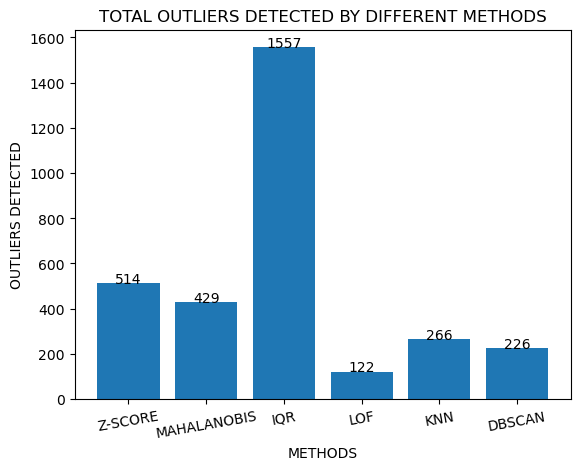

In [23]:
# Function to add labels on top of each bar in the bar chart

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.1, f'{int(y[i])}', ha='center')
        
# Define the x-axis labels (methods used for outlier detection)

x = ['Z-SCORE','MAHALANOBIS','IQR', 'LOF', 'KNN', 'DBSCAN']

# Define the y-axis values (total outliers detected by each method)

y = [total_outliers_1, total_outliers_2, total_outliers_3, total_outliers_4,\
    total_outliers_5, total_outliers_6] 

# Plot a bar chart with the methods (x) on the x-axis and the total outliers detected (y) on the y-axis

plt.bar(x, y)

# Call the addlabels function to add the total outlier counts on top of each bar

addlabels(x,y)
plt.title("TOTAL OUTLIERS DETECTED BY DIFFERENT METHODS")
plt.xlabel("METHODS")

# Rotate the x-axis labels slightly (10 degrees) for better readability

plt.xticks(rotation = 10)
plt.ylabel("OUTLIERS DETECTED")
plt.show()

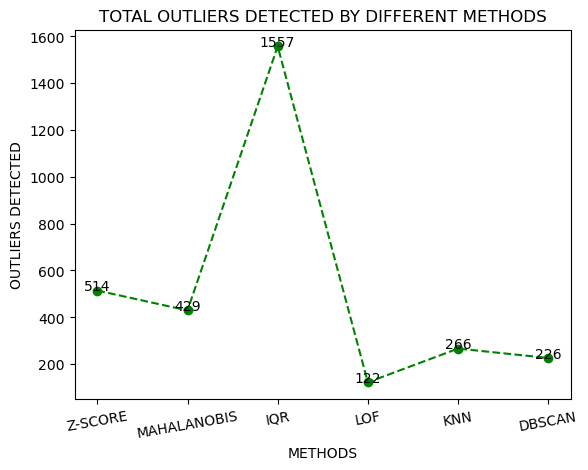

In [24]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.2, f'{int(y[i])}', ha='center') 

x = ['Z-SCORE','MAHALANOBIS','IQR', 'LOF', 'KNN', 'DBSCAN']
y = [total_outliers_1, total_outliers_2, total_outliers_3, total_outliers_4, total_outliers_5, total_outliers_6] 

# Plot a line chart connecting the outlier counts detected by each method

plt.plot(x, y, marker='o', linestyle='--', linewidth=1.5, color='g')

addlabels(x, y)

plt.title("TOTAL OUTLIERS DETECTED BY DIFFERENT METHODS")
plt.xlabel("METHODS")
plt.xticks(rotation=10)
plt.ylabel("OUTLIERS DETECTED")
plt.show()

## THANK YOU